In [28]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [29]:
%matplotlib inline

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [30]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("../data/processed/flight_customer.db")

all_customers_loyalty = pd.read_sql(
    "SELECT * FROM all_customers_loyalty",
    conn
)

all_customers_loyalty.head()


,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [31]:
all_customers_loyalty.shape

(129487, 24)

# Chart #1 — Dissatisfied Customers by Gender

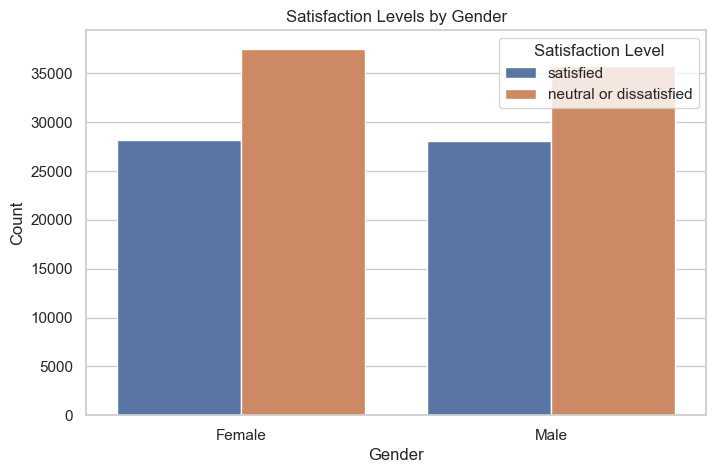

In [32]:
plt.figure(figsize=(8, 5))

sns.countplot(
    data=all_customers_loyalty,
    x="gender",
    hue="satisfaction",
    order=["Female", "Male"]
)

plt.title("Satisfaction Levels by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Satisfaction Level")
plt.show()

# Chart #2 — Average Service Ratings

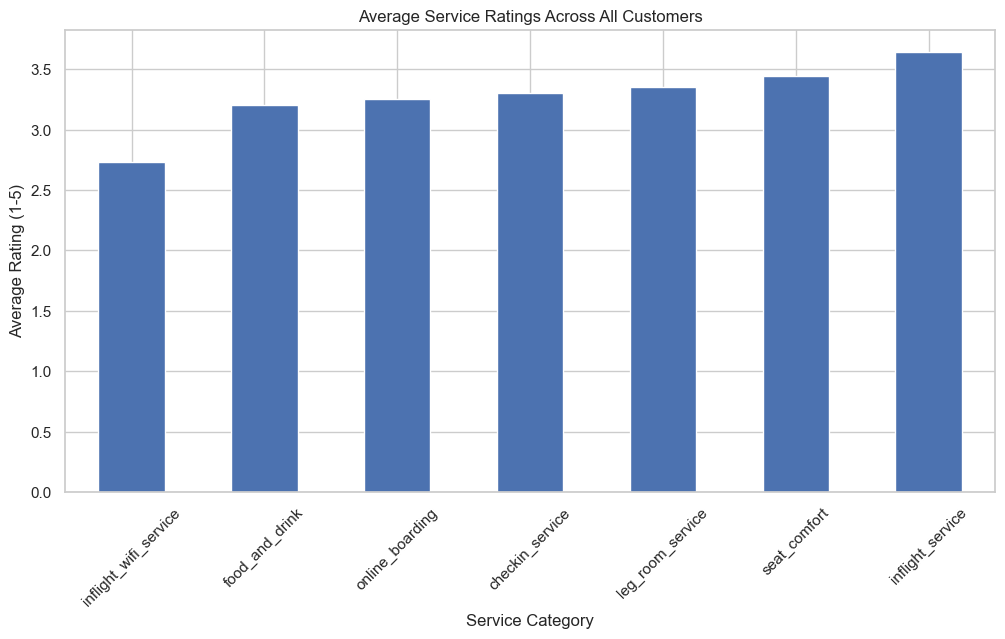

In [33]:
service_cols = [
    "leg_room_service",
    "checkin_service",
    "inflight_service",
    "seat_comfort",
    "food_and_drink",
    "inflight_wifi_service",
    "online_boarding"
]

avg_services = all_customers_loyalty[service_cols].mean()

plt.figure(figsize=(12,6))
avg_services.sort_values().plot(kind='bar')

plt.title("Average Service Ratings Across All Customers")
plt.ylabel("Average Rating (1-5)")
plt.xlabel("Service Category")
plt.xticks(rotation=45)
plt.show()

# Chart #3 — Correlation Heatmap

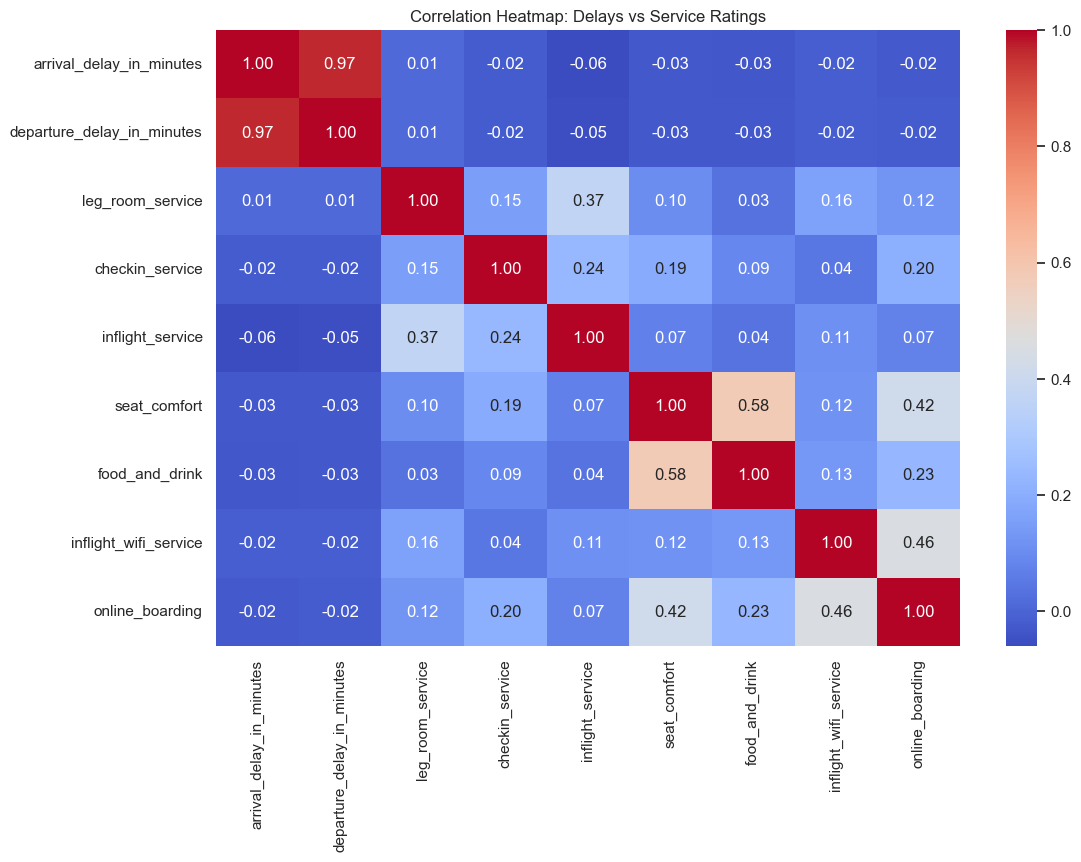

In [36]:
plt.figure(figsize=(12,8))

corr = all_customers_loyalty[
    ["arrival_delay_in_minutes", "departure_delay_in_minutes",
     "leg_room_service", "checkin_service", "inflight_service",
     "seat_comfort", "food_and_drink", "inflight_wifi_service", "online_boarding"]
].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Delays vs Service Ratings")
plt.show()

# Chart #4 — Dissatisfaction by Travel Type

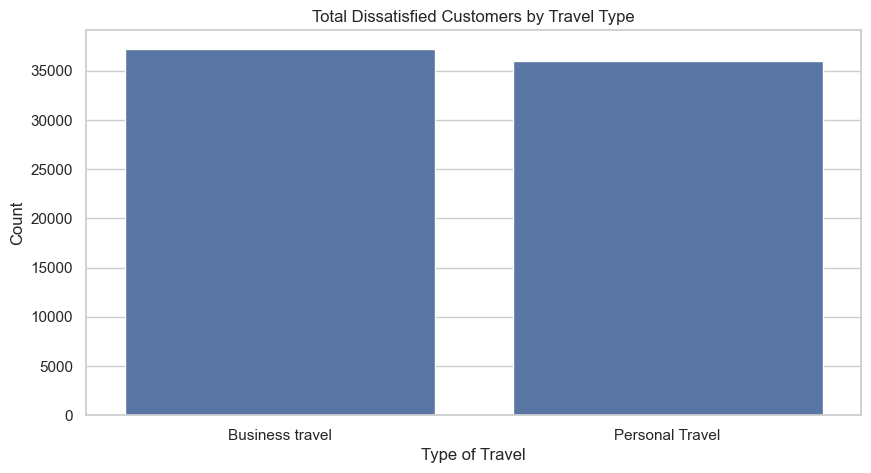

In [37]:
df_diss = all_customers_loyalty[
    all_customers_loyalty['satisfaction'] == 'neutral or dissatisfied'
]

plt.figure(figsize=(10,5))
sns.countplot(
    data=df_diss, 
    x="type_of_travel",
    order=["Business travel", "Personal Travel"]
)

plt.title("Total Dissatisfied Customers by Travel Type")
plt.xlabel("Type of Travel")
plt.ylabel("Count")
plt.show()

# Chart #5 — Boxplot: Delay Distribution

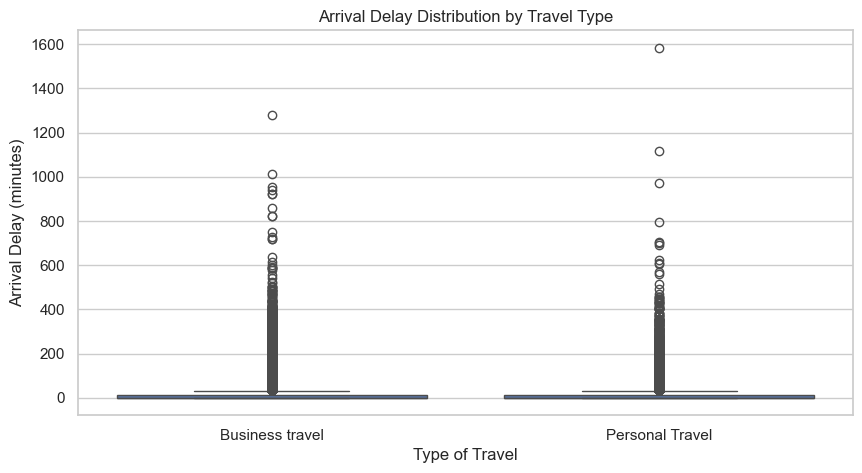

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=all_customers_loyalty,
    x="type_of_travel",
    y="arrival_delay_in_minutes"
)

plt.title("Arrival Delay Distribution by Travel Type")
plt.xlabel("Type of Travel")
plt.ylabel("Arrival Delay (minutes)")
plt.show()